In [15]:
import os
import numpy as np
import pandas as pd
from scipy import interpolate
from scipy.optimize import curve_fit, minimize
from matplotlib import pyplot as plt

In [16]:
# Auxiliary functions
def power_fit(x, m, a, b):
    return m + a*(x**b)

def logistic_fit(alpha, Q, b, v, alpha_N):
    # Implements a more general logistic function (solution of Richards's DE with K=1)
    return 1 / ((1 + Q * np.exp(-b*v*(alpha - alpha_N))) ** (1/v))

def plot_model_curve(results_df, curve_type='probability'):
    assert curve_type in ['probability', 'ext_energy', 'int_energy'], 'Invalid curve type'

    grouped_df = results_df.groupby('N')
    for N, group in grouped_df:
        alphas, means, sems = [], [], []
        alpha_group = group.groupby('alpha')
        for a, g in alpha_group:
            if curve_type == 'probability':
                mean, sem = g["Solved"].mean(), g["Solved"].std()/np.sqrt(g["Solved"].shape[0])
            elif curve_type == 'ext_energy':
                mean, sem = g["Efinale"].mean(), (g["Efinale"].std()/np.sqrt(g["Efinale"].shape[0]))       
            elif curve_type == 'int_energy':
                m = round(a * N)
                mean, sem = g["Efinale"].mean()/m, (g["Efinale"].std()/np.sqrt(g["Efinale"].shape[0]))/m            
            alphas.append(a)
            means.append(mean)
            sems.append(sem)
        plt.errorbar(alphas, means, yerr=sems, fmt='-o', label=f'N={N}')

    plt.xlabel('ɑ', fontsize=18)
    plt.xticks(fontsize=14)
    if curve_type == 'probability':
        plt.ylabel('P(SAT)', fontsize=18)
    elif curve_type == 'ext_energy' or curve_type == 'int_energy':
        plt.ylabel('E', fontsize=18)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()

# 3SAT

Fixed iterations

In [17]:
fixed_result_files = [
    '../../../results_evaluation/3SAT/3SAT-NeuroSAT_supervised_niters=512-ood_largeN.csv',
    '../../../results_evaluation/3SAT/3SAT-NeuroSAT_unsupervised_niters=512-ood_largeN.csv'
]

../../../results_evaluation/3SAT/3SAT-NeuroSAT_supervised_niters=512-ood_largeN.csv


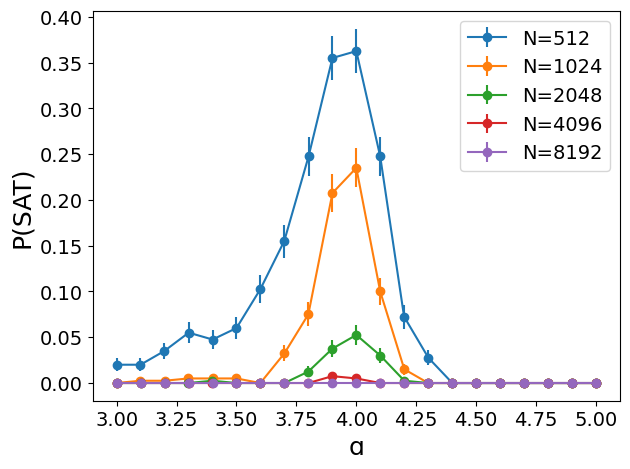

../../../results_evaluation/3SAT/3SAT-NeuroSAT_unsupervised_niters=512-ood_largeN.csv


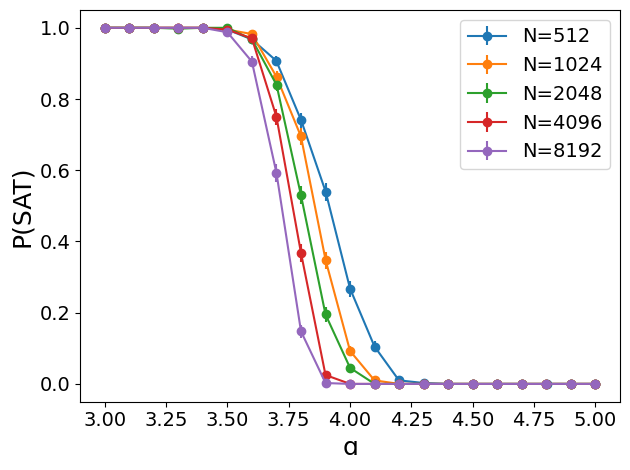

In [18]:
for filepath in fixed_result_files: 
    print(filepath)
    df = pd.read_csv(os.path.normpath(filepath))
    df = df[df.N != 16384]
    plot_model_curve(df, curve_type='probability')

In [19]:
df = pd.read_csv(os.path.normpath(fixed_result_files[-1]))
df = df[df.N != 16384]
print('Avg. solving probability:', df.Solved.mean())

Avg. solving probability: 0.4079761904761905


# 3SAT

Unsupervised w. scaling

../../../results_evaluation/3SAT/3SAT-NeuroSAT_unsupervised_niters=2N-ood_largeN.csv


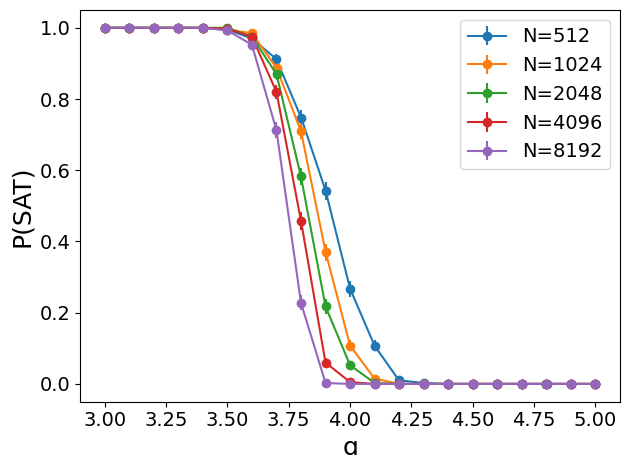

In [20]:
filepath = '../../../results_evaluation/3SAT/3SAT-NeuroSAT_unsupervised_niters=2N-ood_largeN.csv'    
print(filepath)
df = pd.read_csv(os.path.normpath(filepath))
plot_model_curve(df, curve_type='probability')

In [21]:
print('Avg. solving probability:', df.Solved.mean())

Avg. solving probability: 0.41454761904761905


# 4SAT

Unsupervised w. scaling

../../../results_evaluation/4SAT/4SAT-NeuroSAT_unsupervised_niters=2N-ood_largeN.csv


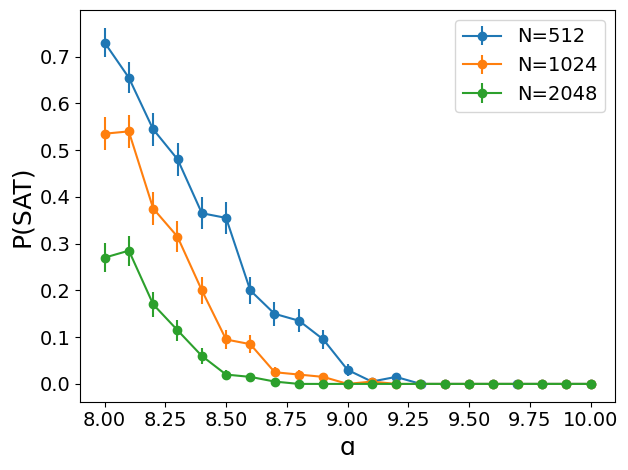

In [22]:
filepath = '../../../results_evaluation/4SAT/4SAT-NeuroSAT_unsupervised_niters=2N-ood_largeN.csv'    
print(filepath)
df = pd.read_csv(os.path.normpath(filepath))
plot_model_curve(df, curve_type='probability')

In [23]:
print('Avg. solving probability:', df.Solved.mean())

Avg. solving probability: 0.10968253968253969
